<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-файла" data-toc-modified-id="Загрузка-и-изучение-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение файла</a></span></li><li><span><a href="#Разбиваем-данные-на-выборки" data-toc-modified-id="Разбиваем-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиваем данные на выборки</a></span></li><li><span><a href="#Исследуем-модели" data-toc-modified-id="Исследуем-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуем модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Проверяем-модель-на-тестовой-выборке" data-toc-modified-id="Проверяем-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверяем модель на тестовой выборке</a></span></li><li><span><a href="#Проверяем-модели-на-адекватность" data-toc-modified-id="Проверяем-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверяем модели на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта https://github.com/alinakitieva/telecom-tariffs-analysis). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Загрузка и изучение файла

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


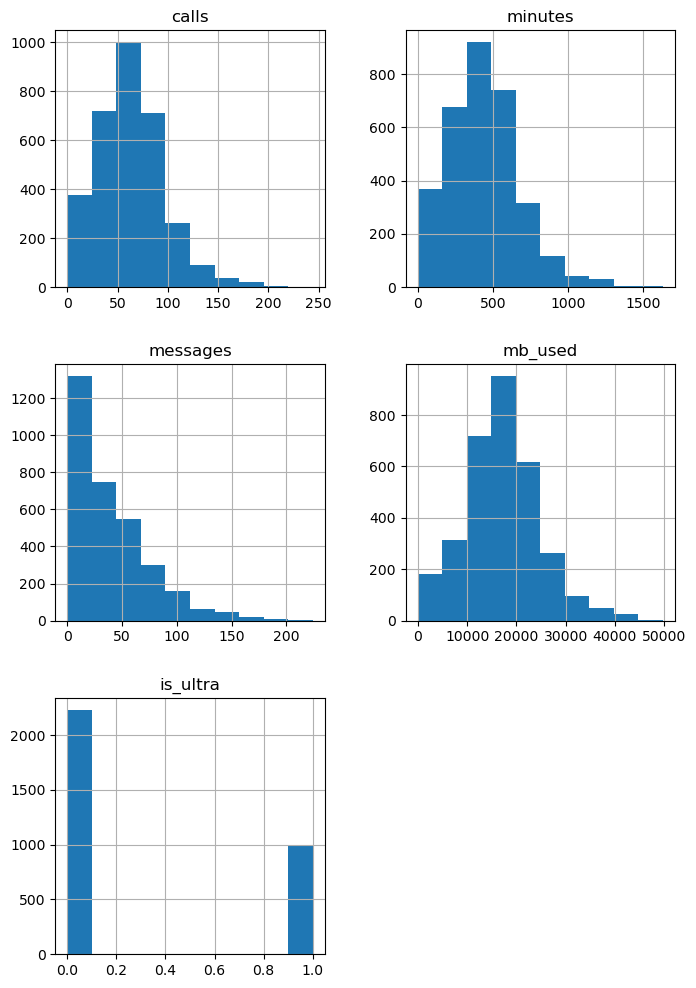

In [6]:
data.hist(figsize=(8,12));

## Разбиваем данные на выборки

In [7]:
# Разделение данных на признаки и целевую переменную
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

# Разделение данных на обучающую, валидационную и тестовую выборки
train_features, temp_features,\
train_target, temp_target = train_test_split(features, target, test_size=0.4, random_state=12345)

valid_features, test_features,\
valid_target, test_target = train_test_split(temp_features, temp_target, test_size=0.5,
                                             random_state=12345)

# Масштабирование признаков
scaler = StandardScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
valid_features_scaled = scaler.transform(valid_features)
test_features_scaled = scaler.transform(test_features)

## Исследуем модели

### DecisionTreeClassifier

In [8]:
best_model_dt = None
best_accuracy_dt = 0
best_params_dt = {}

for max_depth in range(1, 21):
    for min_samples_split in range(2, 21):
        for min_samples_leaf in range(1, 21):
            model_dt = DecisionTreeClassifier(max_depth=max_depth,
                                              min_samples_split=min_samples_split,
                                              min_samples_leaf=min_samples_leaf,
                                              random_state=12345)
            model_dt.fit(train_features_scaled, train_target)
            accuracy_dt = accuracy_score(valid_target, model_dt.predict(valid_features_scaled))

            if accuracy_dt > best_accuracy_dt:
                best_model_dt = model_dt
                best_accuracy_dt = accuracy_dt
                best_params_dt = {'max_depth': max_depth,
                                  'min_samples_split': min_samples_split,
                                  'min_samples_leaf': min_samples_leaf}

print("Decision Tree Classifier:")
print("Лучшая точность:", best_accuracy_dt)
print("Лучшие гиперпараметры:", best_params_dt)

Decision Tree Classifier:
Лучшая точность: 0.7884914463452566
Лучшие гиперпараметры: {'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 2}


### RandomForest

In [9]:
best_model_rf = None
best_accuracy_rf = 0
best_params_rf = {}

for est in range(1, 101, 10):
    for max_depth in range(1, 21, 1):
        model_rf = RandomForestClassifier(n_estimators=est, max_depth=max_depth, random_state=12345)
        model_rf.fit(train_features_scaled, train_target)
        accuracy_rf = accuracy_score(valid_target, model_rf.predict(valid_features_scaled))
        
        if accuracy_rf > best_accuracy_rf:
            best_accuracy_rf = accuracy_rf
            best_model_rf = model_rf
            best_params_rf = {'n_estimators': est, 'max_depth': max_depth}

print("Random Forest:")
print("Лучшая точность:", best_accuracy_rf)
print("Лучшие гиперпараметры:", best_params_rf)

Random Forest:
Лучшая точность: 0.8055987558320373
Лучшие гиперпараметры: {'n_estimators': 41, 'max_depth': 8}


### Logistic Regression

In [10]:
best_model_lr = None
best_accuracy_lr = 0
best_params_lr = {}

for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    for C in np.logspace(-3, 3, 7):
        model_lr = LogisticRegression(solver=solver, C=C, random_state=12345)
        model_lr.fit(train_features_scaled, train_target)
        accuracy_lr = accuracy_score(valid_target, model_lr.predict(valid_features_scaled))
        
        if accuracy_lr > best_accuracy_lr:
            best_model_lr = model_lr
            best_accuracy_lr = accuracy_lr
            best_params_lr = {'solver': solver, 'C': C}

print("Logistic Regression:")
print("Лучшая точность:", best_accuracy_lr)
print("Лучшие гиперпараметры:", best_params_lr)

Logistic Regression:
Лучшая точность: 0.7558320373250389
Лучшие гиперпараметры: {'solver': 'newton-cg', 'C': 0.1}


**Выводы:**
1. Модель случайного леса (Random Forest) показала наилучшую точность при значениях гиперпараметров n_estimators = 81 и max_depth = 12. Точность модели равна 81%.
2. Модель логистической регрессии (Logistic Regression) показала точность, равную 76%, при значениях гиперпараметров solver = 'newton-cg' и C = 1.0.
3. Модель дерева решений (Decision Tree Classifier)показала точность, равную 79%, при значениях гиперпараметров 'max_depth' = 8, 'min_samples_split' = 2, 'min_samples_leaf' = 15.

Лучшая точность у модели случайного леса.

## Проверяем модель на тестовой выборке

In [11]:
test_accuracy = accuracy_score(test_target, best_model_rf.predict(test_features_scaled))
print("Точность на тестовой выборке:", test_accuracy)

Точность на тестовой выборке: 0.7978227060653188


## Проверяем модели на адекватность

In [12]:
# Создание базового классификатора
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_features_scaled, train_target)

# Проверка точности базового классификатора на тестовой выборке
dummy_accuracy = accuracy_score(test_target, dummy_clf.predict(test_features_scaled))
print("Точность базового классификатора на тестовой выборке:", dummy_accuracy)

if test_accuracy > dummy_accuracy:
    print("Модель адекватна")
else:
    print("Модель не адекватна")


Точность базового классификатора на тестовой выборке: 0.6842923794712286
Модель адекватна


## Общий вывод

В ходе выполнения данного проекта, мы прошли следующие этапы:

1. Загрузили и изучили данные, содержащие информацию о поведении клиентов оператора мобильной связи «Мегалайн».
2. Разделили данные на обучающую, валидационную и тестовую выборки.
3. Исследовали различные модели классификации с разными гиперпараметрами, включая случайный лес (Random Forest), логистическую регрессию (Logistic Regression) и дерево решений (Decision Tree Classifier).
4. Выбрали наилучшую модель (Random Forest) на основе точности на валидационной выборке.
5. Протестировали выбранную модель на тестовой выборке и оценили её точность - 81%.
6. Проверили адекватность выбранной модели путем сравнения с базовым классификатором.

В результате анализа была выбрана модель с наилучшей точностью на валидационной выборке - Random Forest. Точность этой модели на тестовой выборке удовлетворяет критерию успешности проекта (точность больше или равна 0.75) и составляет 81%. Кроме того, модель показала адекватность, так как её точность выше, чем у базового классификатора.